# Importing the Libraries and Data

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns

In [88]:
df = pd.read_csv("BAJFINANCE.csv")

In [89]:
df.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


## Target Variable VWAP

##### Ploting the target Variable VWAP over time

<AxesSubplot:>

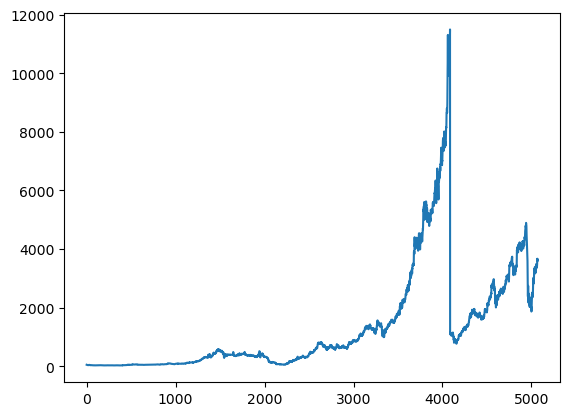

In [90]:
df["VWAP"].plot()

#### We are concerned about the VWAP 

1. Benchmark for Fair Price: 
*  VWAP gives a sense of the average price paid per unit based on trading volume throughout the day.
* It’s often used as a benchmark to assess whether a trade was executed at a favorable price. Buying below or selling above VWAP can indicate a better deal than the market average.

2. Market Sentiment and Trend Indicator: 


VWAP helps in understanding market sentiment:

* If the price is above VWAP, it might indicate a bullish trend (buyers are pushing the price above the average).
* If the price is below VWAP, it might indicate a bearish trend (sellers are dominating, pulling the price below the average).

# Data Pre-Processing and Cleaning

In [91]:
df.set_index("Date", inplace=True)

In [92]:
df.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [93]:
df.shape

(5070, 14)

In [94]:
df.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [95]:
df.dropna()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,3.526895e+15,339815.0,1498309.0,0.1520
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,2.444958e+15,213994.0,944373.0,0.1417
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,1.674361e+15,162374.0,387513.0,0.0840


In [96]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

# Feature Engineering

In [97]:
data=df.copy()

In [98]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [99]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [100]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [101]:
data.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,...,2.911615,NaN,1.656301,NaN,2074.447718,NaN,1.117075e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,...,3.817504,NaN,2.909181,NaN,1352.774926,NaN,5.999789e+09,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,...,1.026320,NaN,1.473092,NaN,1558.845727,NaN,6.822312e+09,NaN,NaN,NaN


In [102]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [103]:
data.isna().sum()

Symbol                       0
Series                       0
Prev Close                   0
Open                         0
High                         0
Low                          0
Last                         0
Close                        0
VWAP                         0
Volume                       0
Turnover                     0
Trades                    2779
Deliverable Volume         446
%Deliverble                446
Highrolling_mean_3           2
Highrolling_mean_7           6
Lowrolling_mean_3            2
Lowrolling_mean_7            6
Volumerolling_mean_3         2
Volumerolling_mean_7         6
Turnoverrolling_mean_3       2
Turnoverrolling_mean_7       6
Tradesrolling_mean_3      2781
Tradesrolling_mean_7      2785
Highrolling_std_3            2
Highrolling_std_7            6
Lowrolling_std_3             2
Lowrolling_std_7             6
Volumerolling_std_3          2
Volumerolling_std_7          6
Turnoverrolling_std_3        2
Turnoverrolling_std_7        6
Tradesro

In [104]:
data.dropna(inplace=True)

# Model Development Using Auto_Arima

In [105]:
training_data=data[0:1800]
test_data=data[1800:]

In [106]:
from pmdarima import auto_arima

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
model = auto_arima(y=training_data['VWAP'], X=training_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.528, Time=2.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.219, Time=1.64 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.342, Time=1.56 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.314, Time=1.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=1.40 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.229, Time=2.21 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 11.250 seconds


In [109]:

model.fit(y=training_data['VWAP'], X=training_data[ind_features])

##  model.fit(y=training_data['VWAP'] , exogenous= training_data[ind_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [110]:
forecast = model.predict(n_periods=len(test_data), X=test_data[ind_features])


In [122]:
test_data['Forecast_ARIMA'] = forecast.values


In [123]:
test_data['Forecast_ARIMA']

Date
2018-09-11    2600.799944
2018-09-12    2625.222353
2018-09-14    2601.072011
2018-09-17    2556.476593
2018-09-18    2572.927471
                 ...     
2020-08-25    3448.018968
2020-08-26    3678.254291
2020-08-27    3685.484983
2020-08-28    3584.028647
2020-08-31    3393.269342
Name: Forecast_ARIMA, Length: 485, dtype: float64

<AxesSubplot:xlabel='Date'>

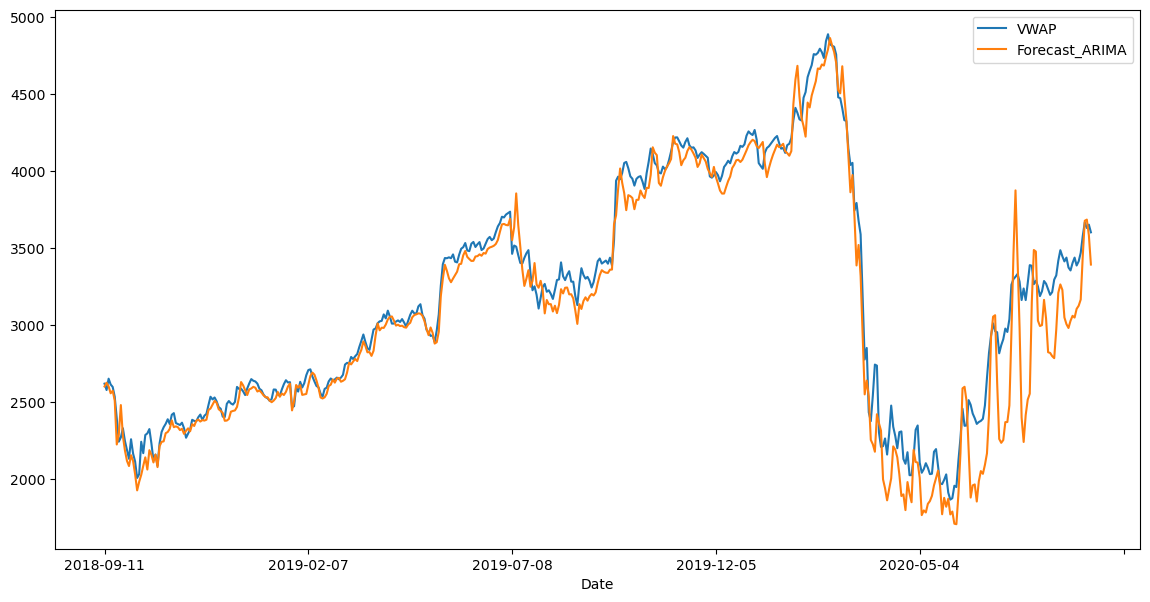

In [124]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

# Checking Accuracy of the Model

In [125]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, and R-squared
mae = mean_absolute_error(test_data['VWAP'], test_data['Forecast_ARIMA'])
mse = mean_squared_error(test_data['VWAP'], test_data['Forecast_ARIMA'])
r2 = r2_score(test_data['VWAP'], test_data['Forecast_ARIMA'])

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 124.58210060553441
Mean Squared Error: 35221.40973414039
R-squared: 0.9349745790911403


## Mean Absolute Error (MAE) = 124.58
Interpretation: On average, the ARIMA model is off by approximately 124.58 units when predicting VWAP.

##### Insight: 
The MAE gives you an idea of how far off the predicted values are from the actual values. While this number is relatively large, it's important to consider the scale of the VWAP values. As the values of VWAP are in the thousands, then an error of 124.58 is acceptable. However, if the VWAP values were in a lower range, this error could be seen as significant.



## Mean Squared Error (MSE) = 35221.41
##### Interpretation:
The square of the average error is 35221.41. Since MSE is sensitive to larger errors, this suggests that there might be some larger deviations in the predictions, causing the error to rise.

##### Insight: 
The large MSE indicates that there are some significant prediction errors (outliers or large deviations) in the dataset, which are contributing disproportionately to the error.


## R-squared = 0.93
##### Interpretation: 
The R-squared value is 0.9349, which means that the model explains 93.5% of the variance in VWAP. This is generally considered an excellent result for a regression model.

##### Insight:
A high R-squared value suggests that the ARIMA model is capturing most of the underlying patterns in the data. It indicates that the model is performing well, and the predictions align closely with the actual values.


##### Key Takeaways:
The model is performing well with 93.5% of variance explained by the model (R-squared), which is excellent.
The MAE and MSE suggest there is room for improvement, especially in reducing larger errors.
While the model is doing well, analyzing residuals and considering further tuning (hyperparameters, seasonal adjustments) could help reduce the error and make predictions more accurate.